(NOTES, Learning Graphs in Python): material not yet organized 

This notebook requires, igraph, cairo: Installation instructions provided 

# Graph Structure #

[Pros/Cons Adjacency Lists/Matrices](https://www.quora.com/What-are-the-pros-and-cons-of-representing-a-graph-in-an-adjacency-list-an-adjacency-matrix-and-objects-classes)

[Pros/Cons Adjacency Lists/Matrices - When to use](http://www.cs.cornell.edu/courses/cs211/2006fa/Lectures/L22-More%20Graphs/L22cs211fa06.pdf)

[Sparse (adjacency) Matrices in scipy](https://docs.scipy.org/doc/scipy/reference/sparse.csgraph.html)
as explained in 
https://codereview.stackexchange.com/questions/95598/order-a-list-of-tuples-or-a-numpy-array-in-a-specific-format

Great introduction (not only) 
https://www.python-course.eu/graphs_python.php

Graphs as Objects:
https://triangleinequality.wordpress.com/2013/08/21/graphs-as-objects-in-python/

Graph theory libraries are available for python:
(Some useful comments on them https://www.quora.com/What-is-the-best-Python-graph-library)

http://networkx.github.io/ (slower, easiest)

http://igraph.org/ (faster, not complicated, not great documentation)

https://graph-tool.skewed.de/ (fastest, but hard to install: https://graph-tool.skewed.de/performance, and requires attention https://stackoverflow.com/questions/36193773/graph-tool-surprisingly-slow-compared-to-networkx) 

### Let's have a look at igraph ### 

Installation instruction at http://igraph.wikidot.com/installing-python-igraph-on-linux

In Linux Mint 18 everything was pretty smooth,  

\>> sudo apt-get install -y libigraph0-dev

for installing the igraph libraries 

\>> sudo pip3 install python-igraph

for compiling python-igraph 

The getting-start tutorial http://igraph.org/python/doc/tutorial/tutorial.html, the API documentation is available at http://igraph.org/python/doc/igraph-module.html (https://github.com/igraph/python-igraph/tree/master/doc/source)

In [17]:
from igraph import Graph, summary 

g = Graph()
g.add_vertices(3) #0,1,2
#g.add_vertices([0,1,2])
g.add_edges([(0,1), (1,2)])
g.add_vertices(3)
#g.delete_vertices([1,2])  try out, deleting vertices delete also the incident edges 
g.add_edges([(2,3),(3,4),(4,5),(5,3)])
g.delete_edges(g.get_eid(2,3)) #Note that edges and vertices IDs are `continuous`, that is when one removed, 
#the successives are renamed, however attributes may be added


In [104]:
print(g)
summary(g)

IGRAPH U--- 3 0 --
+ attr: ciao (v)
IGRAPH U--- 3 0 -- 
+ attr: ciao (v)


In [19]:
g2 = Graph.Tree(127, 2)
g2.get_edgelist()[0:10]
g.isomorphic(g2)

False

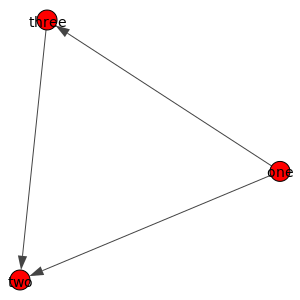

In [20]:
from igraph import *

vertices = ["one", "two", "three"]
edges = [(0,2),(2,1),(0,1)]

g = Graph(vertex_attrs={"label": vertices}, edges=edges, directed=True)
visual_style = {}
visual_style["bbox"] = (300, 300)
plot(g, **visual_style)

## igraph  Visualization ##

Based on Cairo (and pycairo, bindings). 

The installation in Linux Mint 18 has been pretty smooth. The following passage were needed

sudo add-apt-repository ppa:ricotz/testing
sudo apt-get update
sudo apt-get install libcairo2-dev

cd ~
git clone https://github.com/pygobject/pycairo.git

cd pycairo 
sudo python3 setup.py install

Moreover, for python3, it was necessary to slightly modify the __init__py file in igraph/drawing raw 354 from io.getvalue().encode('utf-8) to io.getvalue().decode('utf-8)

Indeed this is a known issue: https://github.com/igraph/python-igraph/commit1/8864b46849b031a3013764d03e167222963c0f5d?diff=split#diff-32d2a59da2ec039816077b378595d915 

For a correct visualization in jupyter notebook another hack is necessary: https://stackoverflow.com/questions/30640489/issue-plotting-vertex-labels-using-igraph-in-ipython, https://stackoverflow.com/questions/30632412/python-igraph-vertex-labels-in-ipython-notebook

In [21]:
import cairo

IGRAPH D--- 3 3 --
+ attr: label (v)
+ edges:
0->2 2->1 0->1


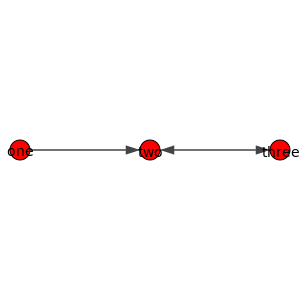

In [22]:
from igraph import plot 
print(g)
visual_style = {}
layout = g.layout("tree")
visual_style["bbox"] = (300, 300)
plot(g, layout = layout, **visual_style)

Various layouts are available: 
- circle, drl, lgl, fr, grid_fr (https://github.com/gephi/gephi/wiki/Fruchterman-Reingold), kk (https://pdfs.semanticscholar.org/b8d3/bca50ccc573c5cb99f7d201e8acce6618f04.pdf), random, tree (rt, http://hci.stanford.edu/courses/cs448b/f09/lectures/CS448B-20091021-GraphsAndTrees.pdf), 
- fr3d, kk3d, random3d, sphere not plottable in python: https://stackoverflow.com/questions/16907564/how-can-i-plot-a-3d-graph-in-python-with-igraph
- grid_fr listed in the documentation, but not implemented 

In [23]:
g.write_adjacency('name')

In [24]:
g.write_lgl('adjacency_list')

/home/clint/.local/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: names attribute does not exists at foreign.c:1697
  if __name__ == '__main__':
/home/clint/.local/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: weights attribute does not exists at foreign.c:1713
  if __name__ == '__main__':


Your best bet is probably GraphML or GML if you want to save igraph graphs in a format that can be read from an external package and you want to preserve numeric and string attributes

## Attributes: ## 
attached to vertex, edge and graphs. The igraph vertex, edge, graphs objects behaves a standard Phython dic, such that the key (a string) is the name of the attribute, and the value represent the attribute. 
***
Note, if attribute $\neq$ string or number, e.g. object, use pickle if you wish to `save' the graph
***

g.vs (vertices), g.es (edges)


{'is_formal': True}
0
0
1
(0, 1)


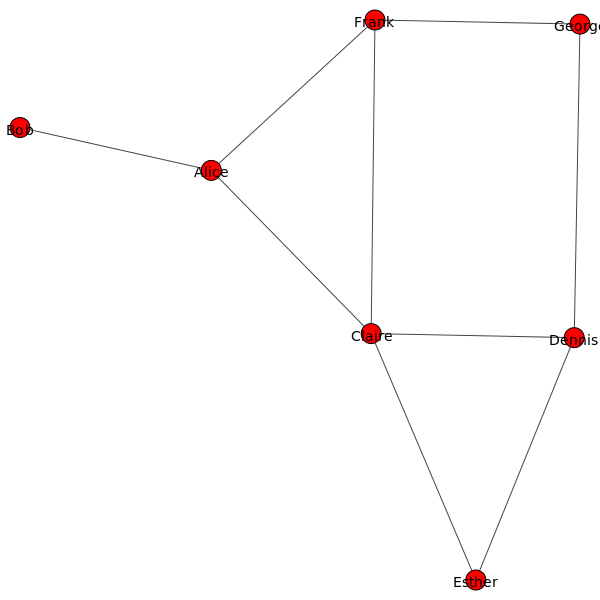

In [25]:
from igraph import plot 
# Create a Graph g with 
g = Graph([(0,1), (0,2), (2,3), (3,4), (4,2), (2,5), (5,0), (6,3), (5,6)])
# To change the attribute of all vertices
g.vs["name"] = ["Alice", "Bob", "Claire", "Dennis", "Esther", "Frank", "George"]
# To change the attribute of all edges 
g.es["is_formal"] = [False, False, True, True, True, False, True, False, False]
# To change the attribute of a single vertex 
g.es[0]['is_formal'] =  True 
print(g.es[0].attributes()) #available also for g.vs
print(g.es[0].index) #available also for g.vs
print(g.es[0].source)
print(g.es[0].target)
print(g.es[0].tuple)
g.vs["label"] = g.vs["name"]
g["name"] = "First Graph"
del g["name"]
plot(g, layout='kk')

### Attribute based querying: ###
select behave like filter (see filter,map, reduce), depending on the parameter: 
_degree := positional arguments before keyword arguments 
a function := vertex included if the function return true (similar to filter)
iterable := integers taken as indexes (the rest is ignored)

select accept also the following keywords: 
name_eq, name_ne, name_lt, name_le, name_gt, name_ge, name_in, name_notin
That is the attribute value must be (equal, or greather then, etc..) to the value of the keyword
***
Note there are more

In [10]:
g.vs.select(_degree = g.maxdegree())["name"]
g.vs.select(name_eq="pet")

## Structural properties of a graph ##
degree(), betweeness(), edge_betweeness(), 

# Some examples# 

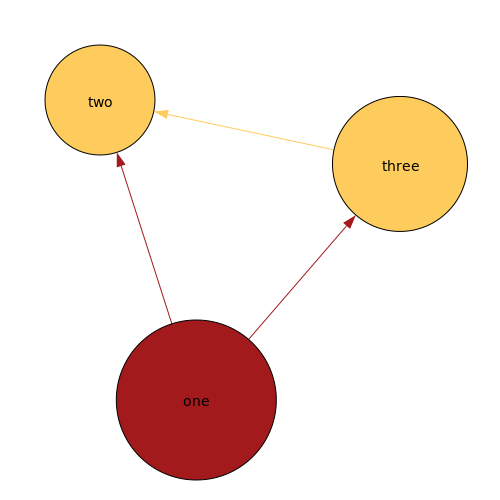

In [11]:
# Styling graph 
from igraph import *
import numpy as np

# Create the graph
vertices = ["one", "two", "three"]
edges = [(0,2),(2,1),(0,1)]

g = Graph(vertex_attrs={"label": vertices}, edges=edges, directed=True)

visual_style = {}

# Scale vertices based on degree
outdegree = g.outdegree()
visual_style["vertex_size"] = [x/max(outdegree)*50+110 for x in outdegree]

# Set bbox and margin
visual_style["bbox"] = (800,800)
visual_style["margin"] = 100

# Define colors used for outdegree visualization
colours = ['#fecc5c', '#a31a1c']

# Order vertices in bins based on outdegree
bins = np.linspace(0, max(outdegree), len(colours))  
digitized_degrees =  np.digitize(outdegree, bins)

# Set colors according to bins
g.vs["color"] = [colours[x-1] for x in digitized_degrees]

# Also color the edges
for ind, color in enumerate(g.vs["color"]):
        edges = g.es.select(_source=ind)
        edges["color"] = [color]
        
# Don't curve the edges
visual_style["edge_curved"] = False
visual_style["bbox"] = (500, 500)
# Plot the graph
plot(g, **visual_style)

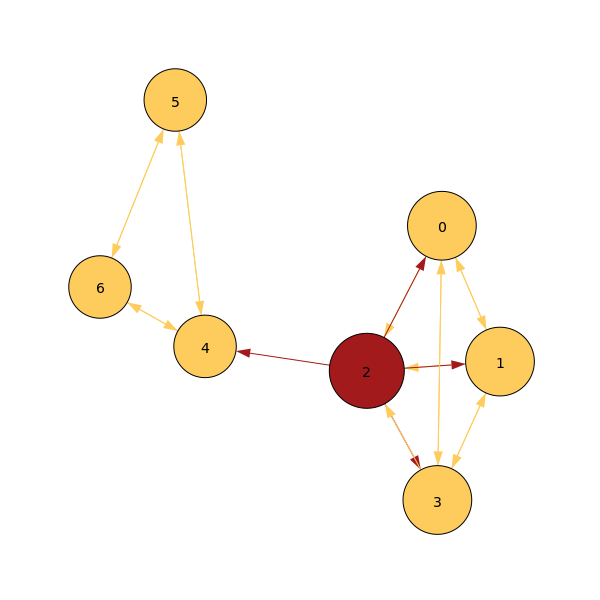

In [12]:
# Community detection 
# https://stackoverflow.com/questions/25254151/using-igraph-in-python-for-community-detection-and-writing-community-number-for

from igraph import *
import numpy as np

# Create the graph
vertices = [i for i in range(7)]
edges = [(0,2),(0,1),(0,3),(1,0),(1,2),(1,3),(2,0),(2,1),(2,3),(3,0),(3,1),(3,2),(2,4),(4,5),(4,6),(5,4),(5,6),(6,4),(6,5)]

g = Graph(vertex_attrs={"label":vertices}, edges=edges, directed=True)

visual_style = {}

# Scale vertices based on degree
outdegree = g.outdegree()
visual_style["vertex_size"] = [x/max(outdegree)*25+50 for x in outdegree]

# Set bbox and margin
visual_style["bbox"] = (600,600)
visual_style["margin"] = 100

# Define colors used for outdegree visualization
colours = ['#fecc5c', '#a31a1c']

# Order vertices in bins based on outdegree
bins = np.linspace(0, max(outdegree), len(colours))  
digitized_degrees =  np.digitize(outdegree, bins)

# Set colors according to bins
g.vs["color"] = [colours[x-1] for x in digitized_degrees]

# Also color the edges
for ind, color in enumerate(g.vs["color"]):
        edges = g.es.select(_source=ind)
        edges["color"] = [color]
        
# Don't curve the edges
visual_style["edge_curved"] = False

# Community detection
communities = g.community_edge_betweenness(directed=True)
clusters = communities.as_clustering()

# Set edge weights based on communities
weights = {v: len(c) for c in clusters for v in c}
g.es["weight"] = [weights[e.tuple[0]] + weights[e.tuple[1]] for e in g.es]

# Choose the layout
N = len(vertices)
visual_style["layout"] = g.layout_fruchterman_reingold(weights=g.es["weight"], maxiter=1000, area=N**3, repulserad=N**3)
        
# Plot the graph
plot(g, **visual_style)

igraph API:

In [112]:
# Ok for some reasons, pop doesn't work (not exactly a dictionary)
from igraph import *
#http://igraph.org/python/doc/igraph.VertexSeq-class.html#attributes
g = Graph()
g.add_vertices([0,1,2])
print(g.vs.get_attribute_values('name'))
for vertex in g.vs:
    print(vertex.attributes())
    print(vertex.index)
    for key in vertex.attributes():
        vertex.attributes()[str(vertex.index)] = vertex.attributes().pop(key)
    print(vertex)
g.vs[0]['ciao']=g.vs[0]['name']
del g.vs[0]['name']
print(g.vs[0])
#List of vertices (index) in the graph 
vertices = [v.index for v in g.vs]
print(vertices)

[0, 1, 2]
{'name': 0}
0
igraph.Vertex(<igraph.Graph object at 0x7f8f97360408>, 0, {'name': 0})
{'name': 1}
1
igraph.Vertex(<igraph.Graph object at 0x7f8f97360408>, 1, {'name': 1})
{'name': 2}
2
igraph.Vertex(<igraph.Graph object at 0x7f8f97360408>, 2, {'name': 2})
igraph.Vertex(<igraph.Graph object at 0x7f8f97360408>, 0, {'ciao': 0})
[0, 1, 2]


In [56]:
#import inspect 
#inspect.getsourcelines(Graph) 
# import dill 
# from dill.source import getsource
# print(getsource(g.vs.get_attribute_values('name')))

In [93]:
for vertex in g.vs: 
    print(vertex.degree())
g.degree(0)

0
0
0


0

betweenness(vertices=None, directed=True, cutoff=None, weights=None, nobigint=True)
	source code 

Calculates or estimates the betweenness of vertices in a graph.

In [94]:
g.betweenness(0,1)

0.0

Getting the number of vertices and edges 

In [106]:
print(g.vcount())
print(g.ecount())

3
0


In [109]:
a = set([])
a.add('ciao')
a

{'ciao'}

In [147]:
from functools import reduce 
%timeit list(set(reduce(lambda x,y: x+y, [[1,2],[3,4],[1,4]])))

The slowest run took 5.33 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.13 µs per loop


In [132]:
[1,2]+[3,4]

[1, 2, 3, 4]

In [153]:
from itertools import chain 
%timeit list(set(chain(*[[1,2],[3,4],[1,4]])))

The slowest run took 5.92 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 878 ns per loop


In [152]:
%timeit list(set([item for sublist in [[1,2],[3,4],[1,4]] for item in sublist]))

1000000 loops, best of 3: 1.13 µs per loop


In [166]:
def target(lista):
    return lista[1]
    
incident_outward_edges = [[1,2],[1,3],[1,4],[1,6],[2,5],[1,8],[1,0],[1,2],[1,3],[1,4],[1,6],[2,5],[1,8],[1,0]]
%timeit targets = set(map(lambda x: target(x), incident_outward_edges))
targets

100000 loops, best of 3: 2.62 µs per loop


{2, 3, 4}

In [167]:
%timeit set([target(x) for x in incident_outward_edges])

The slowest run took 4.08 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 1.99 µs per loop
